<a href="https://colab.research.google.com/github/paulantoine/covid_dept/blob/master/covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import requests
import bs4 as BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight') #'seaborn-notebook'
plt.rcParams.update({'font.size': 14})

In [2]:
url = "https://www.data.gouv.fr/fr/datasets/donnees-hospitalieres-relatives-a-lepidemie-de-covid-19/"
r = requests.get(url)
soup = BeautifulSoup.BeautifulSoup(r.text)
ressources_list = soup.find("div", "resources-list")
url = None
for article in ressources_list.find_all("article"):
  if 'donnees-hospitalieres-nouveaux-covid19' in article.div.h4.text:
    url = article.find("a", "btn btn-sm btn-primary", download=True)["href"]
    break
if url == None:
  raise("data not found")
df = pd.read_csv(url, sep=";")
df.head()


,dep,jour,incid_hosp,incid_rea,incid_dc,incid_rad
0,01,2020-03-19,1,0,0,0
1,01,2020-03-20,0,0,0,1
2,01,2020-03-21,4,0,0,0
3,01,2020-03-22,3,1,0,1
4,01,2020-03-23,14,1,0,5


In [0]:
def display_dept(d_number, d_name):
    dept = df[df.dep==d_number]
    dept.set_index(dept.jour, inplace=True)
    plt.figure(figsize=(15,8))
    plt.plot(dept[["incid_hosp", "incid_rea"]], marker="o")
    plt.xticks(rotation=75)
    plt.legend([d_name], loc=2, fontsize=18)
    plt.show()
    print(dept.tail())

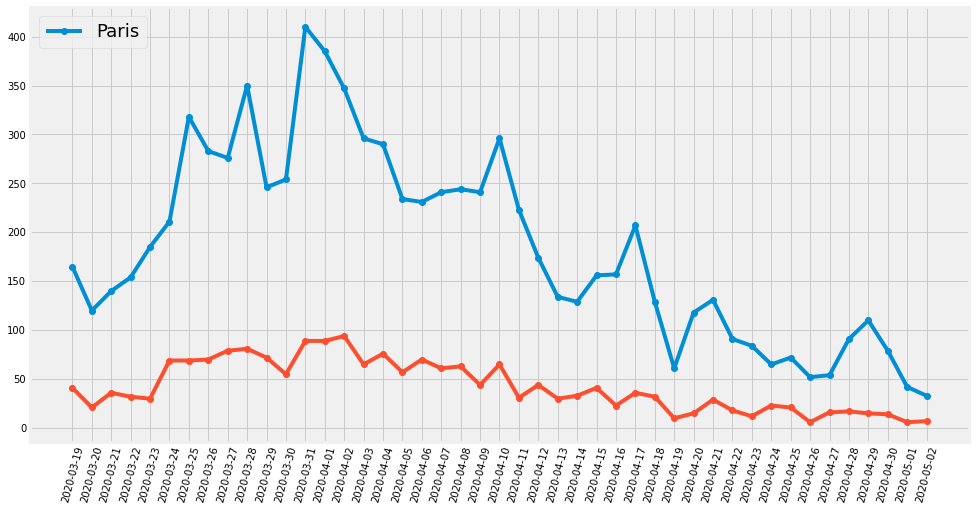

           dep        jour  incid_hosp  incid_rea  incid_dc  incid_rad
jour                                                                  
2020-04-28  75  2020-04-28          91         17        35        101
2020-04-29  75  2020-04-29         110         15        26        154
2020-04-30  75  2020-04-30          79         14        21        103
2020-05-01  75  2020-05-01          42          6         5         76
2020-05-02  75  2020-05-02          33          7        15         64


In [4]:
display_dept("75", "Paris")

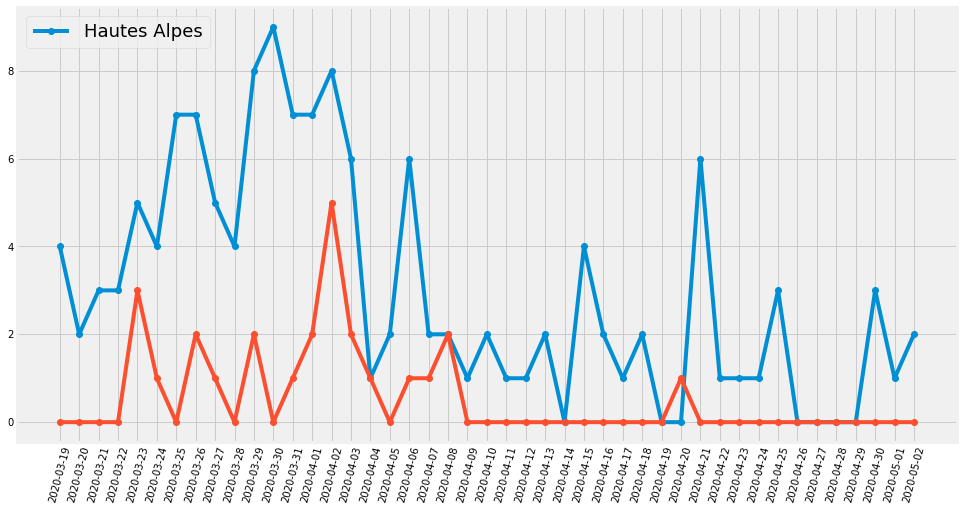

           dep        jour  incid_hosp  incid_rea  incid_dc  incid_rad
jour                                                                  
2020-04-28  05  2020-04-28           0          0         0          1
2020-04-29  05  2020-04-29           0          0         2          0
2020-04-30  05  2020-04-30           3          0         0          0
2020-05-01  05  2020-05-01           1          0         0          0
2020-05-02  05  2020-05-02           2          0         0          0


In [5]:
display_dept("05","Hautes Alpes")

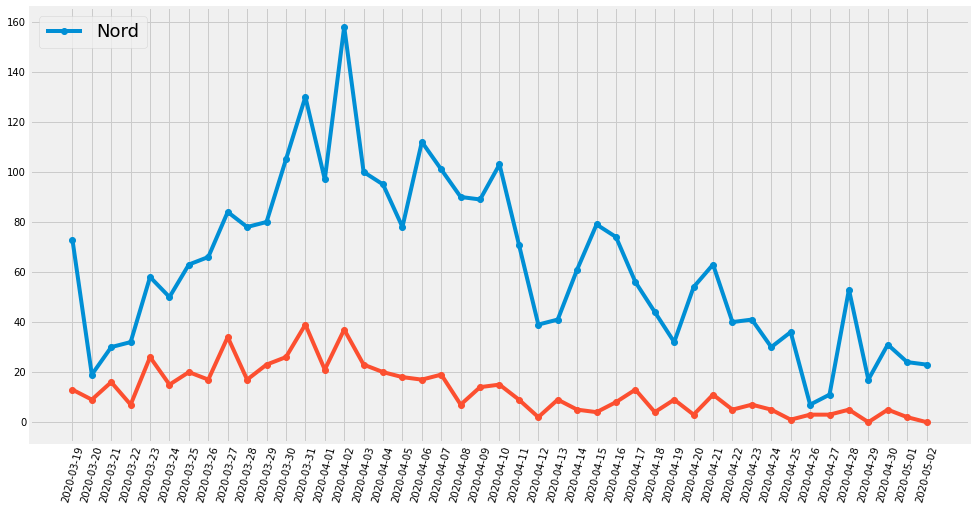

           dep        jour  incid_hosp  incid_rea  incid_dc  incid_rad
jour                                                                  
2020-04-28  59  2020-04-28          53          5         8         45
2020-04-29  59  2020-04-29          17          0         6         39
2020-04-30  59  2020-04-30          31          5         8         36
2020-05-01  59  2020-05-01          24          2         6         21
2020-05-02  59  2020-05-02          23          0         2          3


In [6]:
display_dept("59","Nord")